In [6]:
# Credit Card Fraud Detection using KDD Process
# Dataset: Credit Card Fraud Detection from Kaggle
# URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [7]:
# CELL 1: Import Libraries and Load Data (KDD Phase 1: SELECTION)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, precision_score, recall_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("KDD PHASE 1: SELECTION")
print("="*80)

# Note: Download the dataset from Kaggle first
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
# Place it in your working directory as 'creditcard.csv'

# For Google Colab users:
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/My Drive/creditcard.csv'

file_path = './creditcard.csv'  # Update this path

try:
    df = pd.read_csv(file_path)
    print("✅ Data successfully loaded!")
    print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"\n📊 First few rows of the dataset:")
    print(df.head())
    
    print(f"\n📈 Dataset Information:")
    print(df.info())
    
    print(f"\n🎯 Target Variable Distribution:")
    print(df['Class'].value_counts())
    print(f"\nFraud percentage: {(df['Class'].sum()/len(df))*100:.4f}%")
    
except FileNotFoundError:
    print(f"❌ ERROR: File not found at {file_path}")
    print("Please download the dataset from:")
    print("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")


KDD PHASE 1: SELECTION
✅ Data successfully loaded!
Dataset shape: 284807 rows × 31 columns

📊 First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  


KDD PHASE 2: PRE-PROCESSING (Part 1 - Data Quality Assessment)

1️⃣ Missing Values Analysis:
✅ No missing values found in the dataset!

2️⃣ Duplicate Records:
Number of duplicate rows: 1081

3️⃣ Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8 

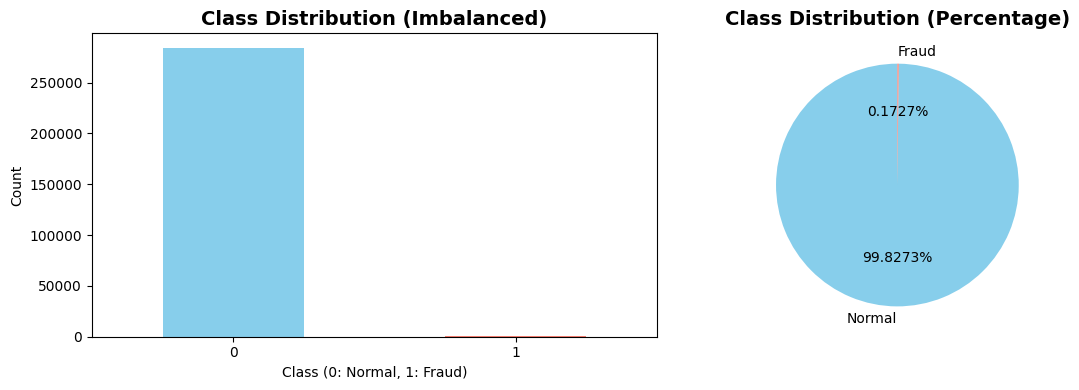


4️⃣ Feature Distribution Analysis:
Amount statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


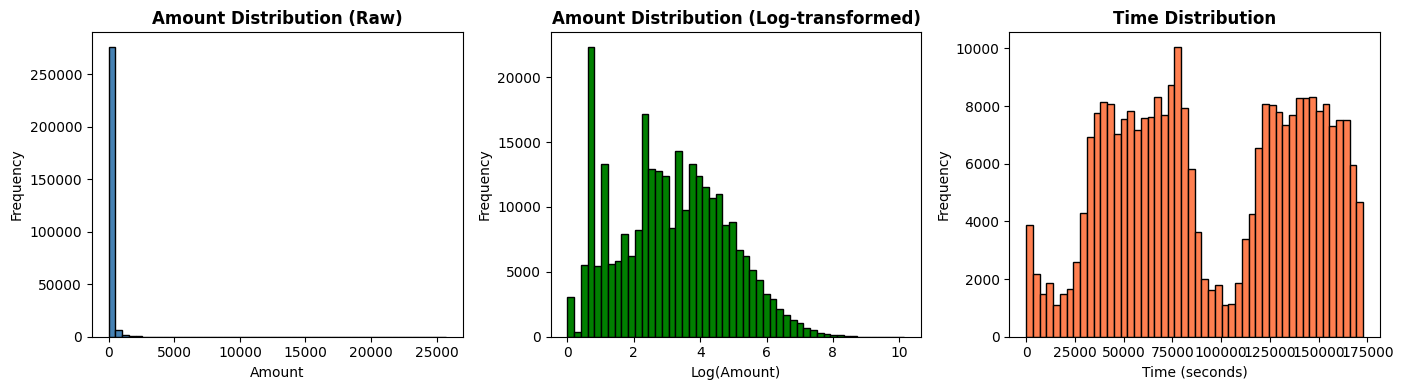

In [8]:

# =============================================================================
# CELL 2: Data Exploration and Quality Assessment (KDD Phase 2: PRE-PROCESSING Part 1)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 2: PRE-PROCESSING (Part 1 - Data Quality Assessment)")
print("="*80)

# 1. Check for missing values
print("\n1️⃣ Missing Values Analysis:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# 2. Check for duplicates
print(f"\n2️⃣ Duplicate Records:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 3. Statistical Summary
print(f"\n3️⃣ Statistical Summary:")
print(df.describe())

# 4. Visualize class imbalance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Imbalanced)', fontsize=14, fontweight='bold')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.4f%%', 
        colors=['skyblue', 'salmon'], startangle=90)
plt.title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Check feature distributions
print(f"\n4️⃣ Feature Distribution Analysis:")
print("Amount statistics:")
print(df['Amount'].describe())

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Amount'], bins=50, color='steelblue', edgecolor='black')
plt.title('Amount Distribution (Raw)', fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.log1p(df['Amount']), bins=50, color='green', edgecolor='black')
plt.title('Amount Distribution (Log-transformed)', fontweight='bold')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Time'], bins=50, color='coral', edgecolor='black')
plt.title('Time Distribution', fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# =============================================================================
# CELL 3: Data Cleaning and Preprocessing (KDD Phase 2: PRE-PROCESSING Part 2)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 2: PRE-PROCESSING (Part 2 - Data Cleaning)")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()

# 1. Remove duplicates (if any)
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df_processed.shape}")

# 2. Handle outliers in 'Amount' (keeping them but noting their presence)
Q1 = df_processed['Amount'].quantile(0.25)
Q3 = df_processed['Amount'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outliers = df_processed[df_processed['Amount'] > outlier_threshold]
print(f"\n📊 Outlier Analysis (Amount):")
print(f"Number of outliers (Amount > {outlier_threshold:.2f}): {len(outliers)}")
print(f"Percentage: {(len(outliers)/len(df_processed))*100:.2f}%")

# We keep outliers as they might be legitimate fraud cases
print("✅ Keeping outliers as they may represent fraud cases")

# 3. Verify data types
print(f"\n📋 Data Types:")
print(df_processed.dtypes.value_counts())

print("\n✅ Pre-processing Phase 2 Complete!")



KDD PHASE 2: PRE-PROCESSING (Part 2 - Data Cleaning)
✅ Removed 1081 duplicate rows
New dataset shape: (283726, 31)

📊 Outlier Analysis (Amount):
Number of outliers (Amount > 185.38): 31685
Percentage: 11.17%
✅ Keeping outliers as they may represent fraud cases

📋 Data Types:
float64    30
int64       1
Name: count, dtype: int64

✅ Pre-processing Phase 2 Complete!


In [10]:
# =============================================================================
# CELL 4: Feature Engineering and Transformation (KDD Phase 3: TRANSFORMATION)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 3: TRANSFORMATION (Feature Engineering)")
print("="*80)

# 1. Time-based features
print("\n1️⃣ Creating time-based features...")
df_processed['Hour'] = (df_processed['Time'] / 3600) % 24
df_processed['Day'] = (df_processed['Time'] / 86400).astype(int)

# Create time period categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_processed['TimePeriod'] = df_processed['Hour'].apply(categorize_time)
print("✅ Created: Hour, Day, TimePeriod")

# 2. Amount-based features
print("\n2️⃣ Creating amount-based features...")
df_processed['Amount_log'] = np.log1p(df_processed['Amount'])
df_processed['Amount_sqrt'] = np.sqrt(df_processed['Amount'])

# Categorize transaction amounts
def categorize_amount(amount):
    if amount == 0:
        return 'Zero'
    elif amount <= 50:
        return 'Small'
    elif amount <= 200:
        return 'Medium'
    elif amount <= 500:
        return 'Large'
    else:
        return 'Very_Large'

df_processed['Amount_Category'] = df_processed['Amount'].apply(categorize_amount)
print("✅ Created: Amount_log, Amount_sqrt, Amount_Category")

# 3. PCA component interactions (V1-V28 are already PCA components)
print("\n3️⃣ Creating PCA interaction features...")
df_processed['V1_V2_interaction'] = df_processed['V1'] * df_processed['V2']
df_processed['V1_V3_interaction'] = df_processed['V1'] * df_processed['V3']
df_processed['PCA_sum'] = df_processed[[f'V{i}' for i in range(1, 29)]].sum(axis=1)
df_processed['PCA_mean'] = df_processed[[f'V{i}' for i in range(1, 29)]].mean(axis=1)
df_processed['PCA_std'] = df_processed[[f'V{i}' for i in range(1, 29)]].std(axis=1)
print("✅ Created: PCA interaction and aggregate features")

# 4. One-hot encode categorical features
print("\n4️⃣ Encoding categorical variables...")
df_processed = pd.get_dummies(df_processed, columns=['TimePeriod', 'Amount_Category'], 
                               drop_first=True, dtype=int)
print(f"✅ One-hot encoding complete. New shape: {df_processed.shape}")

# 5. Display new features
print(f"\n📊 New Dataset Shape: {df_processed.shape}")
print(f"New columns created: {set(df_processed.columns) - set(df.columns)}")

print("\n✅ Transformation Phase Complete!")


KDD PHASE 3: TRANSFORMATION (Feature Engineering)

1️⃣ Creating time-based features...
✅ Created: Hour, Day, TimePeriod

2️⃣ Creating amount-based features...
✅ Created: Amount_log, Amount_sqrt, Amount_Category

3️⃣ Creating PCA interaction features...
✅ Created: PCA interaction and aggregate features

4️⃣ Encoding categorical variables...
✅ One-hot encoding complete. New shape: (283726, 47)

📊 New Dataset Shape: (283726, 47)
New columns created: {'Amount_Category_Small', 'Amount_Category_Zero', 'PCA_std', 'V1_V2_interaction', 'Day', 'Amount_sqrt', 'PCA_mean', 'TimePeriod_Evening', 'TimePeriod_Morning', 'PCA_sum', 'V1_V3_interaction', 'Amount_log', 'Hour', 'TimePeriod_Night', 'Amount_Category_Very_Large', 'Amount_Category_Medium'}

✅ Transformation Phase Complete!



KDD PHASE 3: TRANSFORMATION (Data Splitting & Scaling)
Features shape: (283726, 45)
Target shape: (283726,)
Target distribution:
Class
0    283253
1       473
Name: count, dtype: int64

📊 Data Split:
Training set: 198608 samples (70.0%)
Test set: 85118 samples (30.0%)

Training set class distribution:
Class
0    198277
1       331
Name: count, dtype: int64

Test set class distribution:
Class
0    84976
1      142
Name: count, dtype: int64

⚙️ Scaling features using RobustScaler...
✅ Scaling complete!


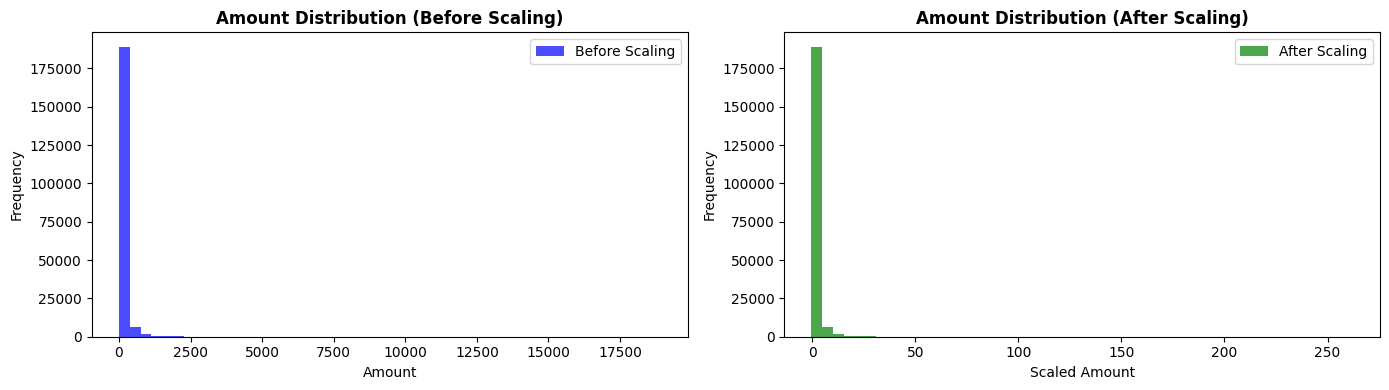


✅ Data Preparation Complete!


In [11]:

# =============================================================================
# CELL 5: Data Splitting and Scaling (KDD Phase 3: TRANSFORMATION Continued)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 3: TRANSFORMATION (Data Splitting & Scaling)")
print("="*80)

# 1. Separate features and target
X = df_processed.drop(['Class', 'Time'], axis=1)  # Remove Time as we created features from it
y = df_processed['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# 2. Split data (70% train, 30% test for better evaluation on imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({(len(X_test)/len(X))*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

# 3. Scale features using RobustScaler (better for outliers)
print(f"\n⚙️ Scaling features using RobustScaler...")
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Scaling complete!")

# 4. Visualize feature distributions after scaling
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.hist(X_train['Amount'], bins=50, alpha=0.7, label='Before Scaling', color='blue')
plt.title('Amount Distribution (Before Scaling)', fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled['Amount'], bins=50, alpha=0.7, label='After Scaling', color='green')
plt.title('Amount Distribution (After Scaling)', fontweight='bold')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ Data Preparation Complete!")


KDD PHASE 3: TRANSFORMATION (Handling Class Imbalance)
📊 Original Training Set Class Distribution:
Class
0    198277
1       331
Name: count, dtype: int64
Imbalance ratio: 599.02:1

⚙️ Applying SMOTE to balance classes...

✅ SMOTE Applied!
New training set shape: (297415, 45)
New class distribution:
Class
0    198277
1     99138
Name: count, dtype: int64
New imbalance ratio: 2.00:1


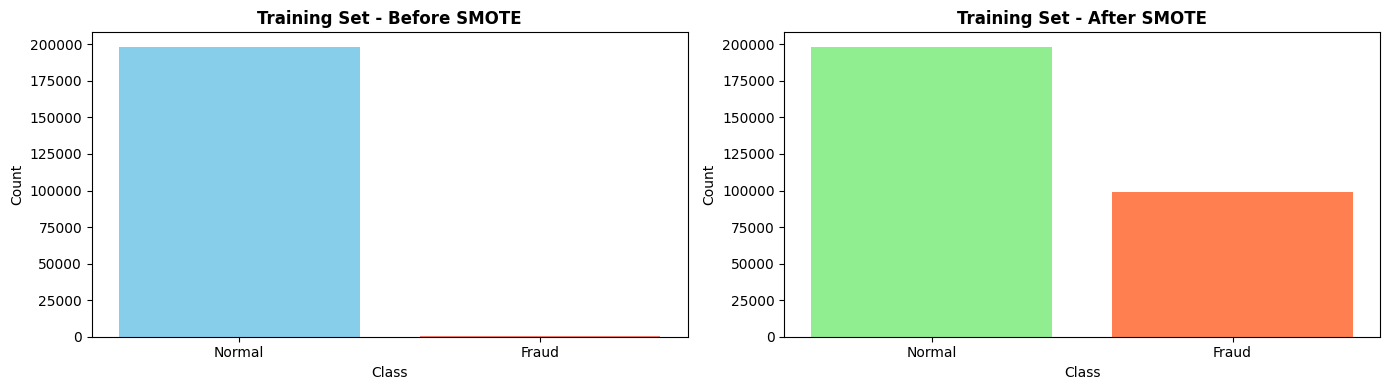


✅ Class Imbalance Handling Complete!


In [12]:

# =============================================================================
# CELL 6: Handle Class Imbalance with SMOTE (KDD Phase 3: TRANSFORMATION Final)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 3: TRANSFORMATION (Handling Class Imbalance)")
print("="*80)

# Original class distribution
print("📊 Original Training Set Class Distribution:")
print(y_train.value_counts())
print(f"Imbalance ratio: {y_train.value_counts()[0] / y_train.value_counts()[1]:.2f}:1")

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
print("\n⚙️ Applying SMOTE to balance classes...")
smote = SMOTE(random_state=42, sampling_strategy=0.5)  # Create 50% minority vs majority
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"\n✅ SMOTE Applied!")
print(f"New training set shape: {X_train_resampled.shape}")
print(f"New class distribution:")
print(pd.Series(y_train_resampled).value_counts())
print(f"New imbalance ratio: {pd.Series(y_train_resampled).value_counts()[0] / pd.Series(y_train_resampled).value_counts()[1]:.2f}:1")

# Visualize the effect of SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Before SMOTE
axes[0].bar(['Normal', 'Fraud'], y_train.value_counts().sort_index(), 
            color=['skyblue', 'salmon'])
axes[0].set_title('Training Set - Before SMOTE', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Class')

# After SMOTE
axes[1].bar(['Normal', 'Fraud'], pd.Series(y_train_resampled).value_counts().sort_index(), 
            color=['lightgreen', 'coral'])
axes[1].set_title('Training Set - After SMOTE', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()

print("\n✅ Class Imbalance Handling Complete!")

In [13]:
# =============================================================================
# CELL 7: Model Training (KDD Phase 4: DATA MINING)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 4: DATA MINING (Model Training)")
print("="*80)

# Define multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, 
                                               class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, 
                                            n_jobs=-1, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42,
                                                     learning_rate=0.1)
}

trained_models = {}

print("🚀 Training multiple models...\n")

for name, model in models.items():
    print(f"{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")
    
    # Train on resampled data
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = model
    
    # Make predictions on test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = model.score(X_test_scaled, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"✅ Training Complete!")
    print(f"\n📊 Performance Metrics on Test Set:")
    print(f"  • Accuracy:  {accuracy:.4f}")
    print(f"  • Precision: {precision:.4f}")
    print(f"  • Recall:    {recall:.4f}")
    print(f"  • F1-Score:  {f1:.4f}")
    print(f"  • ROC-AUC:   {roc_auc:.4f}")
    print()

print("\n🎉 All models trained successfully!")




KDD PHASE 4: DATA MINING (Model Training)
🚀 Training multiple models...

Training: Logistic Regression
✅ Training Complete!

📊 Performance Metrics on Test Set:
  • Accuracy:  0.9684
  • Precision: 0.0454
  • Recall:    0.8944
  • F1-Score:  0.0864
  • ROC-AUC:   0.9544

Training: Random Forest
✅ Training Complete!

📊 Performance Metrics on Test Set:
  • Accuracy:  0.9995
  • Precision: 0.9310
  • Recall:    0.7606
  • F1-Score:  0.8372
  • ROC-AUC:   0.9720

Training: Gradient Boosting
✅ Training Complete!

📊 Performance Metrics on Test Set:
  • Accuracy:  0.9982
  • Precision: 0.4797
  • Recall:    0.8310
  • F1-Score:  0.6082
  • ROC-AUC:   0.9731


🎉 All models trained successfully!



KDD PHASE 5: INTERPRETATION & EVALUATION

1️⃣ CONFUSION MATRICES



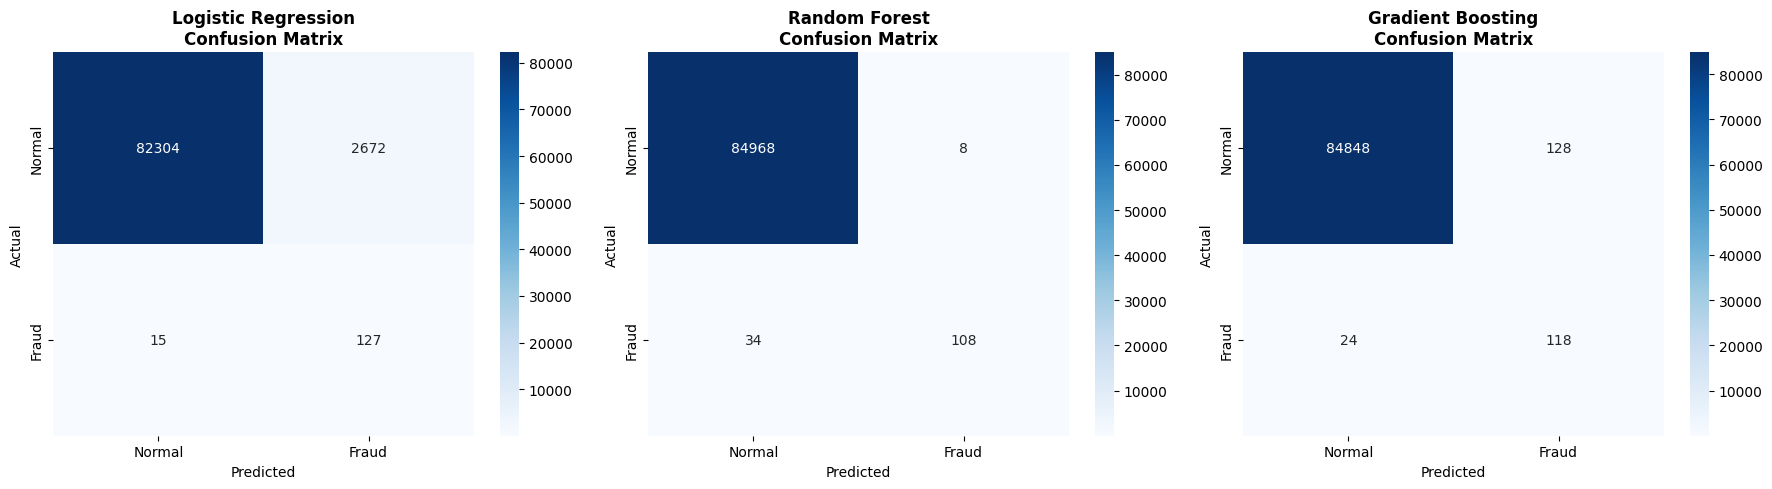


2️⃣ DETAILED CLASSIFICATION REPORTS

Logistic Regression - Classification Report
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98     84976
       Fraud       0.05      0.89      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

Random Forest - Classification Report
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     84976
       Fraud       0.93      0.76      0.84       142

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Gradient Boosting - Classification Report
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     84976
       Fraud       0.48      0.83      0.61       142

    accuracy        

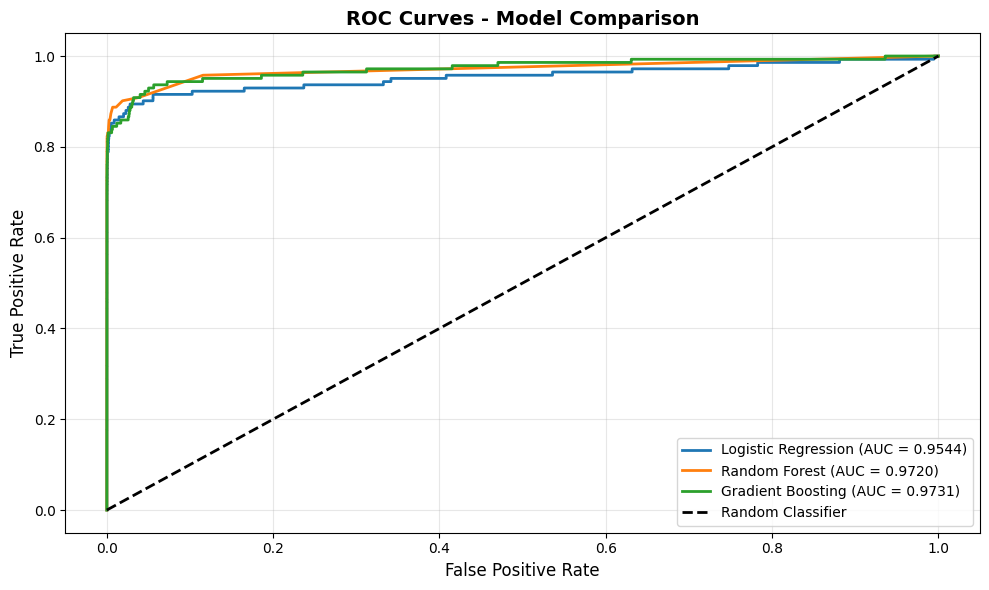


4️⃣ PRECISION-RECALL CURVES



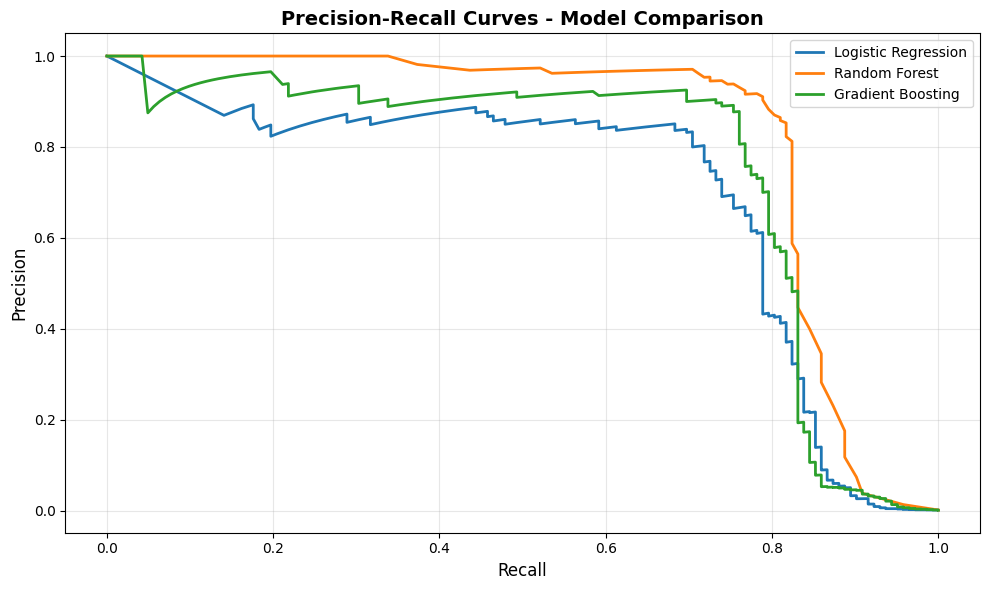


5️⃣ FEATURE IMPORTANCE ANALYSIS

📊 Top 20 Most Important Features (Random Forest):
           Feature  Importance
               V14    0.144334
               V10    0.135277
                V4    0.095561
               V12    0.094419
           PCA_std    0.088187
               V17    0.049929
                V2    0.039829
               V11    0.039368
           PCA_sum    0.038328
          PCA_mean    0.027546
                V3    0.024990
               V16    0.021743
                V9    0.020053
TimePeriod_Evening    0.012701
                V7    0.012552
 V1_V3_interaction    0.011952
               V18    0.011046
                V8    0.009055
 V1_V2_interaction    0.008402
               Day    0.008057


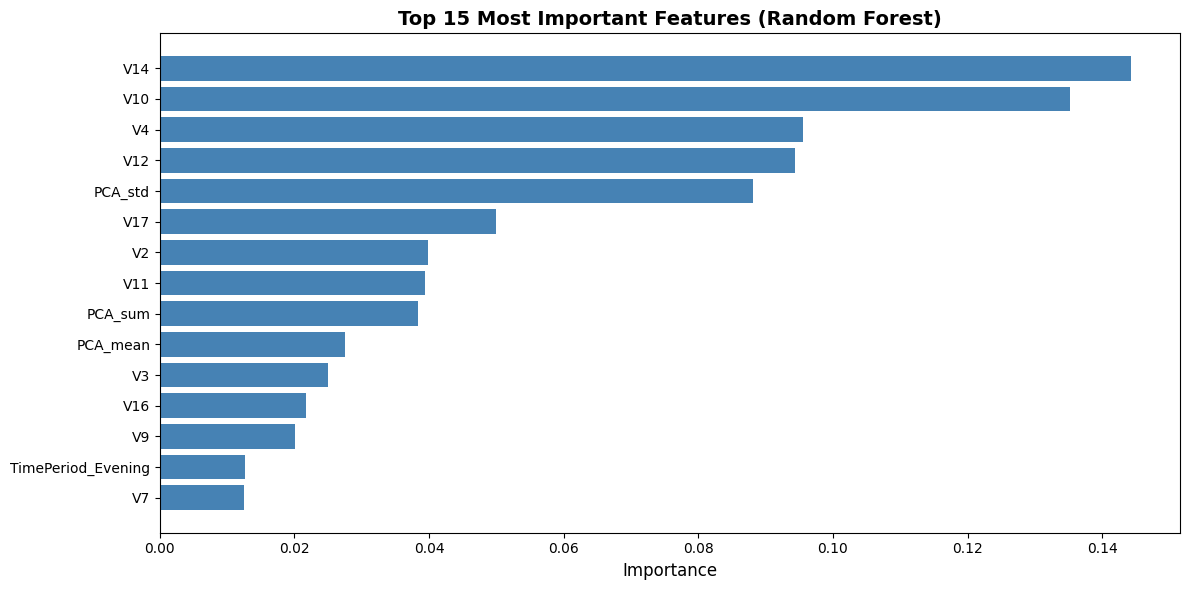

In [14]:
# =============================================================================
# CELL 8: Model Evaluation and Interpretation (KDD Phase 5: INTERPRETATION)
# =============================================================================

print("\n" + "="*80)
print("KDD PHASE 5: INTERPRETATION & EVALUATION")
print("="*80)

# Store predictions for all models
predictions = {}
for name, model in trained_models.items():
    predictions[name] = {
        'y_pred': model.predict(X_test_scaled),
        'y_pred_proba': model.predict_proba(X_test_scaled)[:, 1]
    }

# 1. Confusion Matrices
print("\n1️⃣ CONFUSION MATRICES\n")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'])
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# 2. Classification Reports
print("\n2️⃣ DETAILED CLASSIFICATION REPORTS\n")
for name, preds in predictions.items():
    print(f"{'='*70}")
    print(f"{name} - Classification Report")
    print(f"{'='*70}")
    print(classification_report(y_test, preds['y_pred'], 
                                target_names=['Normal', 'Fraud']))

# 3. ROC Curves
print("\n3️⃣ ROC CURVES\n")
plt.figure(figsize=(10, 6))

for name, preds in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, preds['y_pred_proba'])
    auc_score = roc_auc_score(y_test, preds['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Precision-Recall Curves
print("\n4️⃣ PRECISION-RECALL CURVES\n")
plt.figure(figsize=(10, 6))

for name, preds in predictions.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, preds['y_pred_proba'])
    plt.plot(recall_curve, precision_curve, label=f'{name}', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves - Model Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Feature Importance (for tree-based models)
print("\n5️⃣ FEATURE IMPORTANCE ANALYSIS\n")

# Random Forest Feature Importance
rf_model = trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

print("📊 Top 20 Most Important Features (Random Forest):")
print(feature_importance.to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(12, 6))
top_15 = feature_importance.head(15)
plt.barh(range(len(top_15)), top_15['Importance'], color='steelblue')
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Most Important Features (Random Forest)', 
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [15]:
# =============================================================================
# CELL 9: Model Performance Summary and Business Insights
# =============================================================================

print("\n" + "="*80)
print("KDD KNOWLEDGE DISCOVERY - BUSINESS INSIGHTS")
print("="*80)

# Calculate business metrics
print("\n💰 BUSINESS IMPACT ANALYSIS\n")

for name, preds in predictions.items():
    cm = confusion_matrix(y_test, preds['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    
    # Assume: 
    # - Average fraud amount: $100
    # - Cost of investigating false positive: $5
    # - Cost of missed fraud (false negative): $100
    
    fraud_prevented = tp * 100  # Caught frauds
    fraud_missed = fn * 100     # Missed frauds
    investigation_cost = fp * 5  # False alarms
    
    net_savings = fraud_prevented - fraud_missed - investigation_cost
    
    print(f"{'='*70}")
    print(f"{name} - Business Metrics")
    print(f"{'='*70}")
    print(f"  ✅ Frauds Caught: {tp} transactions (${fraud_prevented:,.2f} saved)")
    print(f"  ❌ Frauds Missed: {fn} transactions (${fraud_missed:,.2f} lost)")
    print(f"  ⚠️  False Alarms: {fp} transactions (${investigation_cost:,.2f} cost)")
    print(f"  💵 Net Savings: ${net_savings:,.2f}")
    print()

# Final Model Recommendation
print("\n" + "="*80)
print("📌 MODEL RECOMMENDATION")
print("="*80)

best_model_name = max(predictions.keys(), 
                     key=lambda x: f1_score(y_test, predictions[x]['y_pred']))
best_f1 = f1_score(y_test, predictions[best_model_name]['y_pred'])
best_recall = recall_score(y_test, predictions[best_model_name]['y_pred'])
best_precision = precision_score(y_test, predictions[best_model_name]['y_pred'])

print(f"\n🏆 RECOMMENDED MODEL: {best_model_name}")
print(f"\nThis model provides the best balance between:")
print(f"  • Catching actual frauds (Recall: {best_recall:.4f})")
print(f"  • Minimizing false alarms (Precision: {best_precision:.4f})")
print(f"  • Overall performance (F1-Score: {best_f1:.4f})")



KDD KNOWLEDGE DISCOVERY - BUSINESS INSIGHTS

💰 BUSINESS IMPACT ANALYSIS

Logistic Regression - Business Metrics
  ✅ Frauds Caught: 127 transactions ($12,700.00 saved)
  ❌ Frauds Missed: 15 transactions ($1,500.00 lost)
  ⚠️  False Alarms: 2672 transactions ($13,360.00 cost)
  💵 Net Savings: $-2,160.00

Random Forest - Business Metrics
  ✅ Frauds Caught: 108 transactions ($10,800.00 saved)
  ❌ Frauds Missed: 34 transactions ($3,400.00 lost)
  ⚠️  False Alarms: 8 transactions ($40.00 cost)
  💵 Net Savings: $7,360.00

Gradient Boosting - Business Metrics
  ✅ Frauds Caught: 118 transactions ($11,800.00 saved)
  ❌ Frauds Missed: 24 transactions ($2,400.00 lost)
  ⚠️  False Alarms: 128 transactions ($640.00 cost)
  💵 Net Savings: $8,760.00


📌 MODEL RECOMMENDATION

🏆 RECOMMENDED MODEL: Random Forest

This model provides the best balance between:
  • Catching actual frauds (Recall: 0.7606)
  • Minimizing false alarms (Precision: 0.9310)
  • Overall performance (F1-Score: 0.8372)
